In [2]:
import librosa
import matplotlib.pyplot as plt
import torch, torchaudio
import IPython.display as display

from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

/Users/yingli/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA


In [2]:
display.Audio("John_1_1_YingLi.wav", autoplay=True)

In [11]:
import torch, torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer, Wav2Vec2CTCTokenizer

tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)

input_values = tokenizer(audio, return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = tokenizer.batch_decode(prediction)[0]

print(transcription)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IN THE BEGINNING WAS THE WORD AND THE WORD WAS WITH GOD AND THE WORD WAS GOD


In [10]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
processor = Wav2Vec2Processor.from_pretrained("indonesian-nlp/wav2vec2-large-xlsr-indonesian")
model = Wav2Vec2ForCTC.from_pretrained("indonesian-nlp/wav2vec2-large-xlsr-indonesian")

file_dir = "/Users/yingli/Downloads/cv-corpus-12.0-2022-12-07-id/id/clips_wav/"
file_name = "common_voice_id_19051299.wav"
raw_audio, rate = torchaudio.load(file_dir+file_name)
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input_values = processor(audio[0,:], sampling_rate=16000, return_tensors="pt", padding=True).input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = processor.batch_decode(prediction)[0]

print(transcription)


/Users/yingli/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


john mewakili kelasnya di perlombaan renang


In [21]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
tokenizer = Wav2Vec2Tokenizer.from_pretrained("indonesian-nlp/wav2vec2-large-xlsr-indonesian")
model = Wav2Vec2ForCTC.from_pretrained("indonesian-nlp/wav2vec2-large-xlsr-indonesian")

file_dir = "/Users/yingli/Downloads/cv-corpus-12.0-2022-12-07-id/id/clips_wav/"
file_name = "common_voice_id_19051299.wav"
raw_audio, rate = torchaudio.load(file_dir+file_name)
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input_values = tokenizer(audio[0,:], return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = tokenizer.batch_decode(prediction)[0]

print(transcription)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


john mewakili kelasnya di pelombaran anak


In [3]:
audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/voice_clips_wav/common_voice_en_1716.wav", sr=16000)
audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)

In [4]:
# Importing Wav2Vec pretrained model
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/Users/yingli/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:757: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
audio_raw, rate = torchaudio.load("/Users/yingli/Development/AppliedDataScience/voice_clips_wav/common_voice_en_1717.wav")
#audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/voice_clips_wav/common_voice_en_1716.wav", sr=16000)

audio = torchaudio.functional.resample(audio_raw, orig_freq = rate, new_freq=16000)


In [6]:
input_values = tokenizer(audio[0,:], return_tensors = "pt").input_values

In [7]:
input_values.shape

torch.Size([1, 121344])

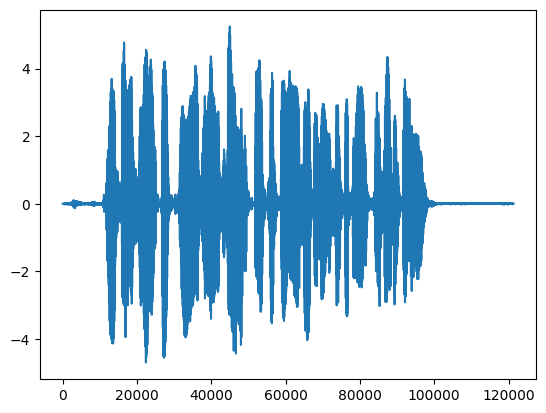

In [13]:
plt.plot(input_values[0,:].numpy())

In [14]:
# Storing logits (non-normalized prediction values)
logits = model(input_values).logits

In [15]:
logits[:,0,:].max()

tensor(14.5329, grad_fn=<MaxBackward1>)

In [16]:
# Storing predicted id's
prediction = torch.argmax(logits, dim = -1)


In [17]:
tokenizer.batch_decode(prediction)[0]

'YOU CAN AVOID THIS IN YOUR OWN CODE BY PREFERRING EASILY RECOGNIZED IDENTIFIERS'

In [18]:
# Passing the prediction to the tokenzer decode to get the transcription
transcription = tokenizer.batch_decode(prediction)[0]
print(transcription)

YOU CAN AVOID THIS IN YOUR OWN CODE BY PREFERRING EASILY RECOGNIZED IDENTIFIERS


In [19]:
import torch, torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* actual content according to common voice meta-data:
  - John mewakili kelasnya di perlombaan renang.


In [14]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)

input_values = processor(audio, sampling_rate = 16000, return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = processor.batch_decode(prediction)[0]

print(transcription)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IN THE BEGINNING WAS THE WORD AND THE WORD WAS WITH GOD AND THE WORD WAS GOD


In [16]:
x = model.wav2vec2(input_values)

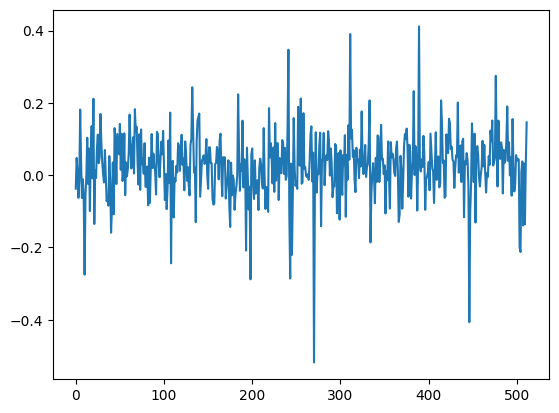

In [17]:
plt.plot(x.extract_features.mean(axis=1)[0,:].detach().numpy())

In [18]:
audio.shape[0]

96000

In [19]:
x.extract_features.shape

torch.Size([1, 299, 512])

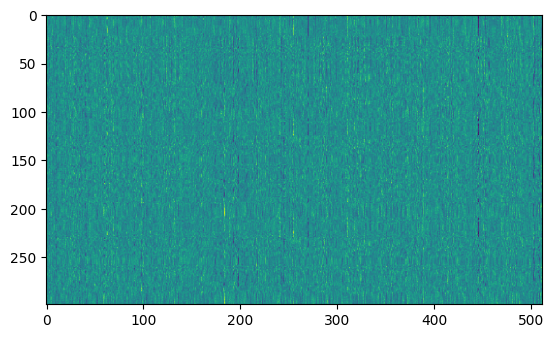

In [20]:
plt.imshow(x.extract_features[0,:,:].detach().numpy())

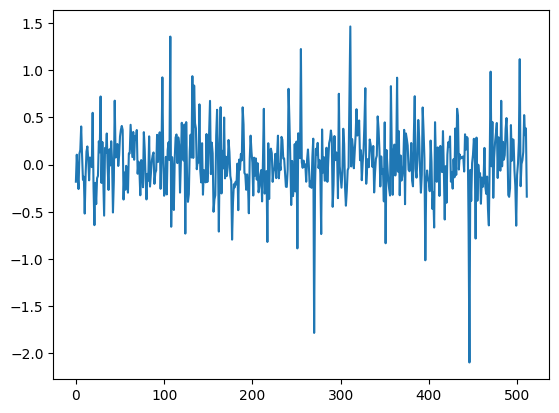

In [26]:
plt.plot(x.extract_features[0,2,:].detach().numpy())

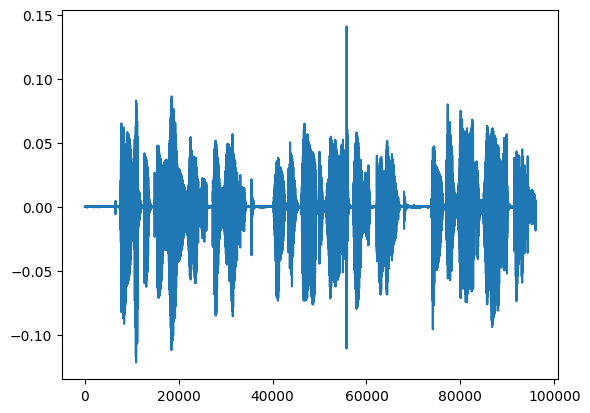

In [21]:
plt.plot(audio)

In [22]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

raw_audio, rate = torchaudio.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav")
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input_values = processor(audio[0,:], sampling_rate = 16000, return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = processor.decode(prediction[0])

print(transcription)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IN THE BEGINNING WAS THE WORD AND THE WORD WAS WITH GOD AND THE WORD WAS GOD


In [25]:
# !pip install transformers
# !pip install datasets
import soundfile as sf
import torch
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# load pretrained model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

librispeech_samples_ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")


# load audio
audio_input, sample_rate = sf.read(librispeech_samples_ds[0]["file"])

# pad input values and return pt tensor
input_values = processor(audio_input, sampling_rate=sample_rate, return_tensors="pt").input_values

# INFERENCE

# retrieve logits & take argmax
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)

# transcribe
transcription = processor.decode(predicted_ids[0])

# FINE-TUNE

target_transcription = "A MAN SAID TO THE UNIVERSE I EXIST"

# encode labels
with processor.as_target_processor():
  labels = processor(target_transcription, return_tensors="pt").input_ids

# compute loss by passing labels
loss = model(input_values, labels=labels).loss
loss.backward()
print(transcription)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Found cached dataset librispeech_asr_dummy (/Users/yingli/.cache/huggingface/datasets/patrickvonplaten___librispeech_asr_dummy/clean/2.1.0/f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc)


A MAN SAID TO THE UNIVERSE SIR I EXIST


In [30]:
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# load pretrained model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)




# pad input values and return pt tensor
input_values = processor(audio, sampling_rate=16000, return_tensors="pt").input_values

# INFERENCE

# retrieve logits & take argmax
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)

# transcribe
transcription = processor.decode(predicted_ids[0])

# FINE-TUNE

target_transcription = "A MAN SAID TO THE UNIVERSE I EXIST"

# encode labels
with processor.as_target_processor():
  labels = processor(target_transcription, return_tensors="pt").input_ids

# compute loss by passing labels
loss = model(input_values, labels=labels).loss
loss.backward()

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
transcription

'IN THE BEGINNING WAS THE WORD AND THE WORD WAS WITH GOD AND THE WORD WAS GOD'

In [32]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

model_name = "voidful/wav2vec2-xlsr-multilingual-56"
processor_name = "voidful/wav2vec2-xlsr-multilingual-56"
model = Wav2Vec2ForCTC.from_pretrained(model_name)
processor = Wav2Vec2Processor.from_pretrained(processor_name)


raw_audio, rate = torchaudio.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav")
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input_values = processor(audio[0,:], sampling_rate = 16000, return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = processor.decode(prediction[0])

print(transcription)



in the beginning was the word and the word was wit got ad the word was got


In [33]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

model_name = "voidful/wav2vec2-xlsr-multilingual-56"
processor_name = "voidful/wav2vec2-xlsr-multilingual-56"
model = Wav2Vec2ForCTC.from_pretrained(model_name)
processor = Wav2Vec2Processor.from_pretrained(processor_name)

file_dir = "/Users/yingli/Downloads/cv-corpus-12.0-2022-12-07-id/id/clips_wav/"
file_name = "common_voice_id_19051299.wav"
raw_audio, rate = torchaudio.load(file_dir+file_name)
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input_values = processor(audio[0,:], sampling_rate = 16000, return_tensors = "pt").input_values
logits = model(input_values).logits
prediction = torch.argmax(logits, dim = -1)
transcription = processor.decode(prediction[0])

print(transcription)



john movakili klasinadiprolom anhona


John mewakili kelasnya di perlombaan renang.

In [54]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torchaudio

# load model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)

# audio file is decoded on the fly
#array, fs = torchaudio.load("/data/A-VB/audio/wav/00001.wav")
#input = processor(array.squeeze(), sampling_rate=fs, return_tensors="pt")

input = processor(audio, sampling_rate=16000, return_tensors="pt")


# apply the model to the input array from wav
with torch.no_grad():
    outputs = model(**input)

# extract last hidden state, compute average, convert to numpy
last_hidden_states = outputs.last_hidden_state.squeeze().mean(axis=0).numpy()

# change to list to print
print(f"Hidden state shape: {last_hidden_states.shape}")
# Hidden state shape: (768,)


Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Hidden state shape: (768,)


In [57]:
audio

array([-1.0822987e-10,  1.3824319e-10, -1.7462298e-10, ...,
       -1.5770443e-02, -1.2472671e-02, -6.3970052e-03], dtype=float32)

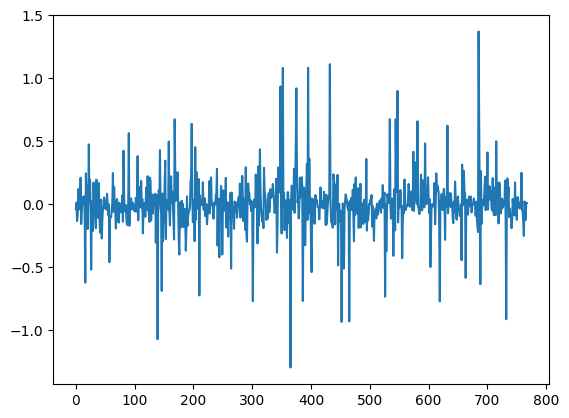

In [35]:
plt.plot(last_hidden_states)

In [2]:
import torch
from transformers import AutoProcessor, AutoModelForAudioClassification, Wav2Vec2FeatureExtractor
import numpy as np
#from pydub import AudioSegment

# https://github.com/ehcalabres/EMOVoice
# the preprocessor was derived from https://huggingface.co/jonatasgrosman/wav2vec2-large-xlsr-53-english
# processor1 = AutoProcessor.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")
# ^^^ no preload model available for this model (above), but the `feature_extractor` works in place
model1 = AutoModelForAudioClassification.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-large-xlsr-53")


/Users/yingli/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.output.weight', 'classifier.dense.weight', 'classifier.output.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequen

In [25]:
audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/emotion_sound/Male-Sobbing-Hard-Crying.mp3", sr=16000)
audio

array([], dtype=float32)

In [29]:
#audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/applieddatascience/sample_code/John_1_1_YingLi.wav", sr=16000)
#audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/ESD/0011/Angry/evaluation/0011_000352.wav", sr=16000)
#audio, rate = librosa.load("/Users/yingli/Development/AppliedDataScience/emotion_sound/male_sorbing.wav", sr=16000)
raw_audio, rate = torchaudio.load("/Users/yingli/Development/AppliedDataScience/RAVDESS/Actor_24/03-01-05-01-01-01-24.wav")
audio = torchaudio.functional.resample(raw_audio, orig_freq = rate, new_freq=16000)

input = feature_extractor(
        raw_speech=audio[0,:],
        sampling_rate=16000,
        padding=True,
        return_tensors="pt")

result = model1.forward(input.input_values.float())
    # making sense of the result 
id2label = {
        "0": "angry",
        "1": "calm",
        "2": "disgust",
        "3": "fearful",
        "4": "happy",
        "5": "neutral",
        "6": "sad",
        "7": "surprised"
    }
interp = dict(zip(id2label.values(), list(round(float(i),4) for i in result[0][0])))
interp

{'angry': -0.0567,
 'calm': -0.0148,
 'disgust': -0.0617,
 'fearful': -0.125,
 'happy': -0.0914,
 'neutral': -0.1504,
 'sad': 0.0342,
 'surprised': 0.0895}

In [14]:
display.Audio(audio,rate=16000)

In [12]:
audio.shape

(23680,)

In [ ]:
def predict_emotion(audio_file):
    if not audio_file:
        # I fetched some samples with known emotions from here: https://www.fesliyanstudios.com/royalty-free-sound-effects-download/poeple-crying-252
        audio_file = 'mp3/dude-crying.mp3'
    sound = AudioSegment.from_file(audio_file)
    sound = sound.set_frame_rate(16000)
    sound_array = np.array(sound.get_array_of_samples())
    # this model is VERY SLOW, so best to pass in small sections that contain 
    # emotional words from the transcript. like 10s or less.
    # how to make sub-chunk  -- this was necessary even with very short audio files 
    # test = torch.tensor(input.input_values.float()[:, :100000])

    input = feature_extractor(
        raw_speech=sound_array,
        sampling_rate=16000,
        padding=True,
        return_tensors="pt")

    result = model1.forward(input.input_values.float())
    # making sense of the result 
    id2label = {
        "0": "angry",
        "1": "calm",
        "2": "disgust",
        "3": "fearful",
        "4": "happy",
        "5": "neutral",
        "6": "sad",
        "7": "surprised"
    }
    interp = dict(zip(id2label.values(), list(round(float(i),4) for i in result[0][0])))
    return interp

In [3]:
from scipy import stats
def get_stats(x):
    if np.any(x) == False:
        return np.nan,np.nan,np.nan,np.nan,np.nan, np.nan, np.nan
    else:
        return x.mean(),x.std(),x.var(),x.min(), x.max(), stats.skew(x),stats.kurtosis(x) 
        #for variance, np.var uses ddof=0 as default, whereas scipy.stats use ddof=1 

In [47]:
import numpy as np
import pandas as pd
from scipy import stats

import os
from pathlib import Path

from tqdm import tqdm

from typing import List, Dict, Any, Tuple
ROOT_DATA_DIR = "/Users/yingli/Development/AppliedDataScience/RAVDESS"
RAVDESS_DIR = f"{ROOT_DATA_DIR}"
def __load_waves_from_dir(path: str):
    audio_list = []
    rate_list = []
    len_list = []
    f0_list = []
    zcr_list = []
    mfcc_list = []
    path_list = []
    path = Path(path)
    for file_path in path.rglob('*.wav'):
        x, sr = librosa.load(file_path, sr=None) 
        path_list.append(file_path.name)
        audio_list.append(x)
        rate_list.append(sr)
        len_list.append(x.shape[0]/sr)
        f0, voiced_flag, voiced_probs = librosa.pyin(y=x, sr=sr,fmin=50, fmax=1000, fill_na=None)
        f0_stats = get_stats(f0[voiced_flag])
        f0_list.append(f0_stats)
        zcr = librosa.feature.zero_crossing_rate(y=x)
        zcr_stats = get_stats(zcr[0,:]) # zero_crossing_rate returns a 2d array 
        zcr_list.append(zcr_stats)
        mfcc = librosa.feature.mfcc(y=x,sr=sr,n_mfcc=25,dct_type=2) #n_mel was defaulted to 128 for mel filter bands
        mfcc_mean = mfcc.mean(axis=1)
        mfcc_list.append(mfcc_mean)
    stats_names = ['mean','std','var','min','max','skew','kurtosis']
    f0_features = pd.DataFrame(np.stack(f0_list), columns=["f0_" + sn for sn in stats_names])
    zcr_features = pd.DataFrame(np.stack(zcr_list), columns=["zcr_" + sn for sn in stats_names])
    mfcc_array = np.stack(mfcc_list,axis=0)
    mfcc_features = pd.DataFrame(mfcc_array, columns=["mfcc_"+str(n).rjust(2, "0") for n in range(mfcc_array.shape[1])])
    voice_features = pd.concat([f0_features, zcr_features, mfcc_features], axis=1)
    voice_features["sample_rate"] = rate_list
    voice_features["len_in_second"] = len_list
    voice_features["path"] = path_list
    voice_features["emotion"] = voice_features["path"].apply(lambda x: x.split('.')[0].split('-')[2])
    voice_features["intensity"] = voice_features["path"].apply(lambda x: x.split('.')[0].split('-')[3])
    voice_features["actor"] = voice_features["path"].apply(lambda x: x.split('.')[0].split('-')[-1])

    return voice_features

voice_features = __load_waves_from_dir(f"{RAVDESS_DIR}")
voice_features.to_csv("RAVDESS_voice_features_20230425.csv", index=None)
#__load_waves_from_dir(RAVDESS_DIR)

In [79]:
voice_features["gender"] = voice_features["actor"].astype('int') % 2 
#.apply(lambda x: 'male' if x.to_int()%2 == 0 else 'female').head(30)
                                                        

In [53]:
#emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
#Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

emotion_names = ['neutral', 'calm','happy', 'sad', 
                 'angry', 'fearful', 'disgust', 'surprised']
voice_features['emotion'].replace(['01','02','03','04','05','06','07','08'], 
                              emotion_names,inplace = True)
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']

              precision    recall  f1-score   support

       angry     0.7067    0.8281    0.7626        64
        calm     0.6909    0.5846    0.6333        65
     disgust     0.7143    0.4918    0.5825        61
     fearful     0.5714    0.6250    0.5970        64
       happy     0.6792    0.5455    0.6050        66
     neutral     0.3784    0.5000    0.4308        28
         sad     0.5735    0.6290    0.6000        62
   surprised     0.6974    0.8030    0.7465        66

    accuracy                         0.6366       476
   macro avg     0.6265    0.6259    0.6197       476
weighted avg     0.6456    0.6366    0.6348       476



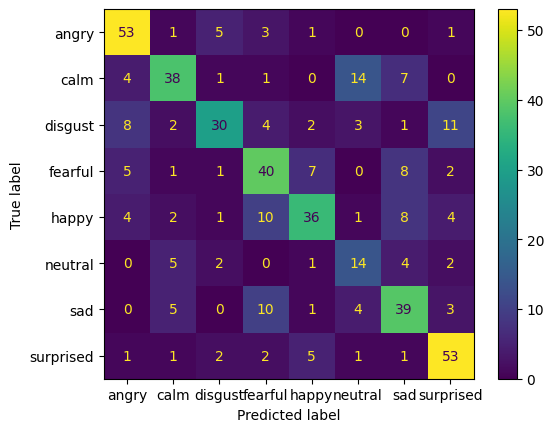

In [85]:
X = voice_features[col_list_f0 + col_list_mfcc+col_list_zcr]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_features['emotion']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)

mlp_clf = MLPClassifier(random_state=1, learning_rate= "adaptive", 
                        max_iter=1000, hidden_layer_sizes=(500,200,200,100)).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

       angry     0.6216    0.6571    0.6389        35
        calm     0.6897    0.7692    0.7273        26
     disgust     0.7667    0.6389    0.6970        36
     fearful     0.6364    0.7241    0.6774        29
       happy     0.4483    0.4815    0.4643        27
     neutral     0.5882    0.5263    0.5556        19
         sad     0.6250    0.5714    0.5970        35
   surprised     0.7419    0.7419    0.7419        31

    accuracy                         0.6429       238
   macro avg     0.6397    0.6388    0.6374       238
weighted avg     0.6466    0.6429    0.6428       238



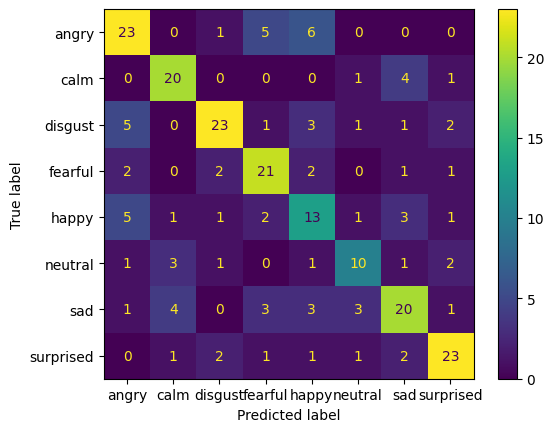

In [87]:
X = voice_features.query("gender == 1")[col_list_f0 + col_list_mfcc+col_list_zcr]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_features.query("gender == 1")['emotion']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)

mlp_clf = MLPClassifier(random_state=1, learning_rate= "adaptive", 
                        max_iter=1000, hidden_layer_sizes=(300,200,200)).fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred, digits = 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)